In [1]:
from solver.riemann import Riemann
from solver.eos import EquationOfState
from solver.vector import Vector
from solver.solver import ADER_ENO, ADER_WENO, Godunov, FORCE, BoundaryCondition
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
%matplotlib widget

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "axes.labelsize": "x-large"
})
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24
BIGGEST_SIZE = 30

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

In [4]:
order: int = 5
bcLeft: BoundaryCondition = BoundaryCondition.TRANSMISSIVE
bcRight: BoundaryCondition = BoundaryCondition.TRANSMISSIVE
gamma = 1.4
C = 0.9
eos = EquationOfState(gamma)
test = 1

In [5]:
if test == 1:
    u_L = Vector(1.0, 0.75, 1.0)
    u_R = Vector(0.125, 0, 0.1)
    xMin: float = 0.0
    xMax: float = 1.0
    x0: float = 0.3
    nCells: int = 100
    tMax = 0.2
elif test == 2:
    u_L = Vector(0.445, 0.698, 3.528)
    u_R = Vector(0.5, 0.0, 0.571)
    xMin: float = -5.0
    xMax: float = 5.0
    x0: float = 0.0
    nCells: int = 200
    tMax = 1.3
elif test == 3:
    u_L = Vector(1.0, -2.0, 0.4)
    u_R = Vector(1.0, 2.0, 0.4)
    xMin: float = 0.0
    xMax: float = 1.0
    x0: float = 0.5
    nCells: int = 100
    tMax = 0.15
elif test == 4:
    u_L = Vector(0.1261192, 8.9047029, 782.92899)
    u_R = Vector(6.591493, 2.2654207, 3.1544874)
    xMin: float = 0.1
    xMax: float = 0.6
    x0: float = 0.5
    nCells: int = 400
    tMax = 0.0039
elif test == 5:
    u_L = Vector(1.0, 0, 1000.0)
    u_R = Vector(1.0, 0, 0.01)
    xMin: float = 0.0
    xMax: float = 1.0
    x0: float = 0.5
    nCells: int = 200
    tMax = 0.012
elif test == 6:
    u_L = Vector(1.4, 0.1, 1.0)
    u_R = Vector(1.0, 0.1, 1.0)
    xMin: float = 0.0
    xMax: float = 1.0
    x0: float = 0.5
    nCells: int = 100
    tMax = 2.0

In [6]:
rs = Riemann(u_L, u_R, eos)

In [7]:
nCellsExact = 1000

In [8]:
xArrayExact, primitiveArray = rs.constructExactSolution(xMin, xMax, x0, nCellsExact, tMax)

In [9]:
rhoArrayExact = np.array([q[0] for q in primitiveArray])

In [10]:
vArrayExact = np.array([q[1] for q in primitiveArray])

In [11]:
pArrayExact = np.array([q[2]for q in primitiveArray])

In [12]:
initialConditionFunction = lambda x: u_L if x < x0 else u_R

In [13]:
solver = ADER_WENO(xMin, xMax, nCells, order, C, tMax, initialConditionFunction, eos, bcLeft, bcRight)
# solver = Godunov(xMin, xMax, nCells, C, tMax, initialConditionFunction, eos, bcLeft, bcRight)

In [14]:
start = time.time()
solver.solveODE()
end = time.time()

In [15]:
print(f"duration = {end - start} seconds")

duration = 37198.4827439785 seconds


In [16]:
xArray, primitiveArray = solver.returnData()

In [17]:
rhoArray = np.array([q[0] for q in primitiveArray])

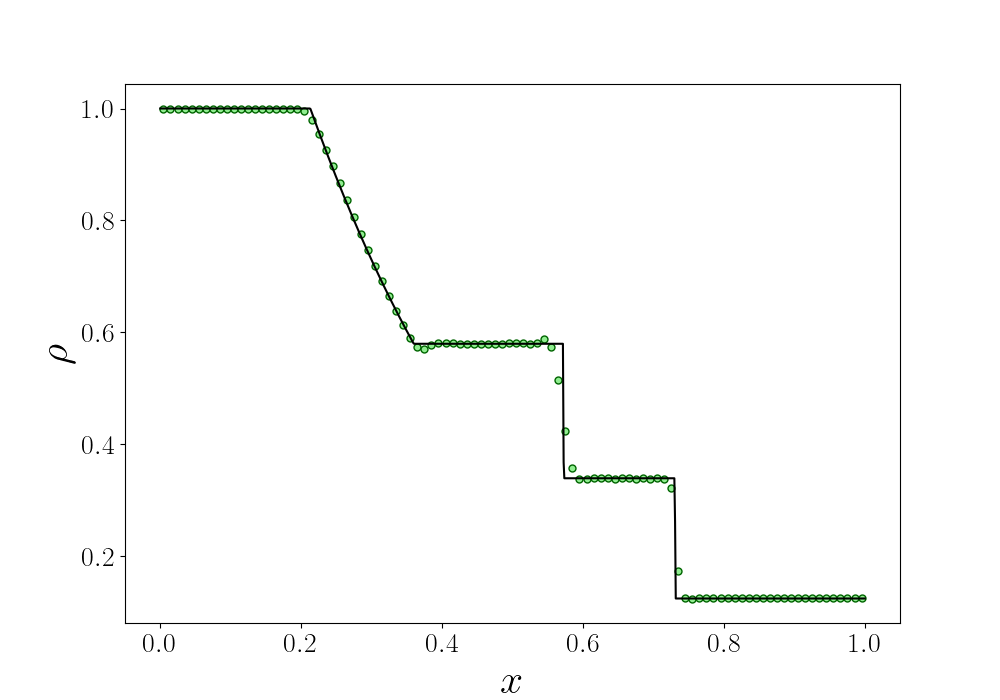

In [18]:
fig = plt.figure(figsize=(10, 7))
fig.tight_layout()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\rho$")
ax.plot(xArray, rhoArray, linestyle='none', marker='o', markerfacecolor='lightgreen', markeredgecolor='darkgreen', markersize=5)
ax.plot(xArrayExact, rhoArrayExact, color='black')


In [19]:
vArray = np.array([q[1] for q in primitiveArray])

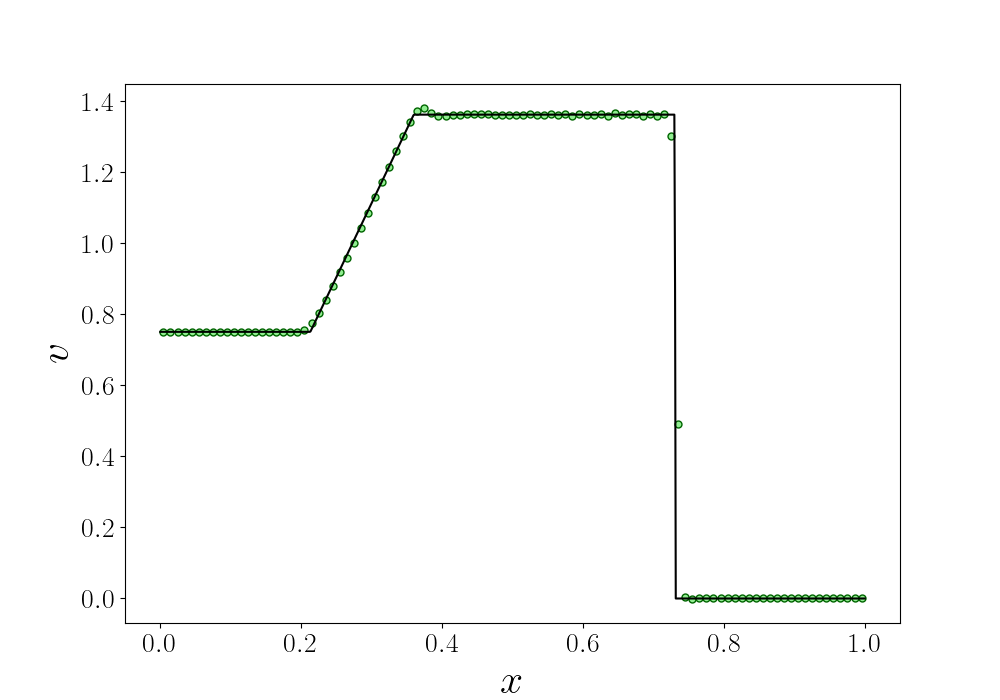

In [20]:
fig = plt.figure(figsize=(10, 7))
fig.tight_layout()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$v$")
ax.plot(xArray, vArray, linestyle='none', marker='o', markerfacecolor='lightgreen', markeredgecolor='darkgreen', markersize=5)
ax.plot(xArrayExact, vArrayExact, color='black')

In [21]:
pArray = np.array([q[2] for q in primitiveArray])

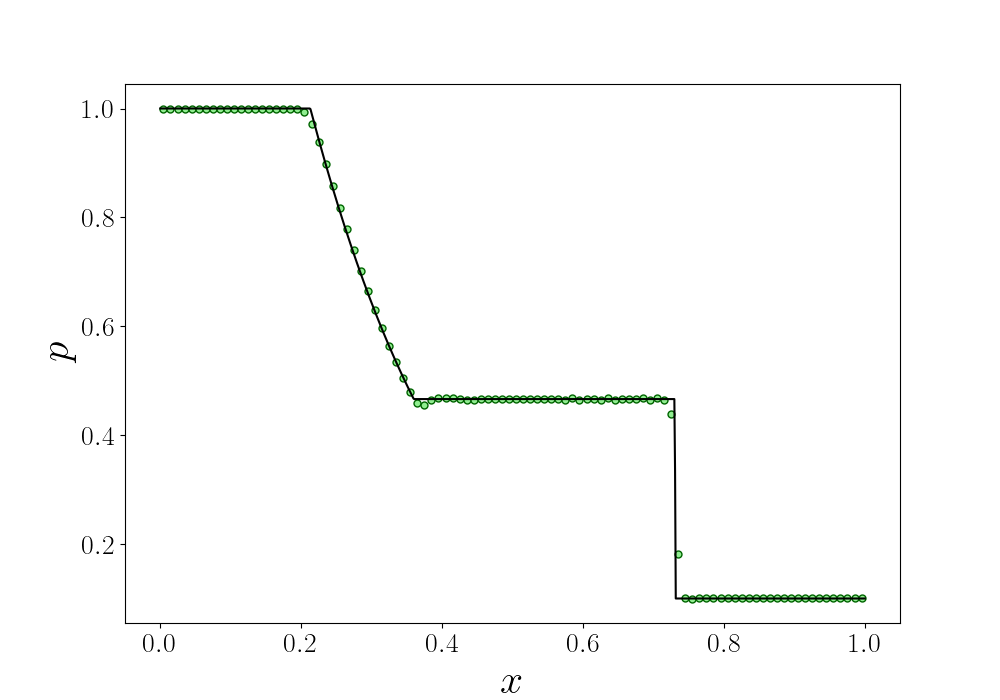

In [26]:
fig = plt.figure(figsize=(10, 7))
fig.tight_layout()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$p$")
ax.plot(xArray, pArray, linestyle='none', marker='o', markerfacecolor='lightgreen', markeredgecolor='darkgreen', markersize=5)
ax.plot(xArrayExact, pArrayExact, color='black')

In [27]:
epsArray = pArray / ((gamma - 1) * rhoArray)

In [28]:
epsArrayExact = pArrayExact / ((gamma - 1) * rhoArrayExact)

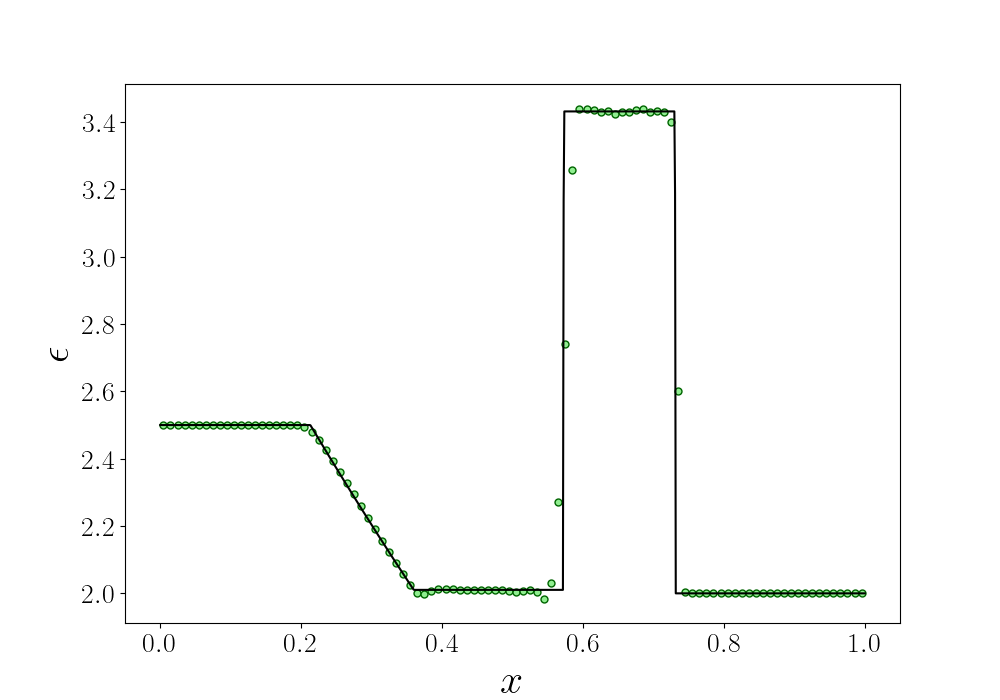

In [29]:
fig = plt.figure(figsize=(10, 7))
fig.tight_layout()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\epsilon$")
ax.plot(xArray, epsArray, linestyle='none', marker='o', markerfacecolor='lightgreen', markeredgecolor='darkgreen', markersize=5)
ax.plot(xArrayExact, epsArrayExact, color='black')